# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Autoencoders for Anomaly Detection

**Steps**:
1. Data Set: Download a dataset of electricity consumption data.
2. Build an Autoencoder: Construct a simple autoencoder using a neural network for the
normal consumption data.
3. Identify Anomalies: Use the trained model to reconstruct the data and identify anomalies based on reconstruction error.
4. Visualize: Plot both the actual and reconstructed data to highlight anomalies.

2025-05-12 12:22:18.493815: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-12 12:22:18.709898: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-12 12:22:18.844871: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747052539.123027   57170 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747052539.226616   57170 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747052539.869874   57170 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


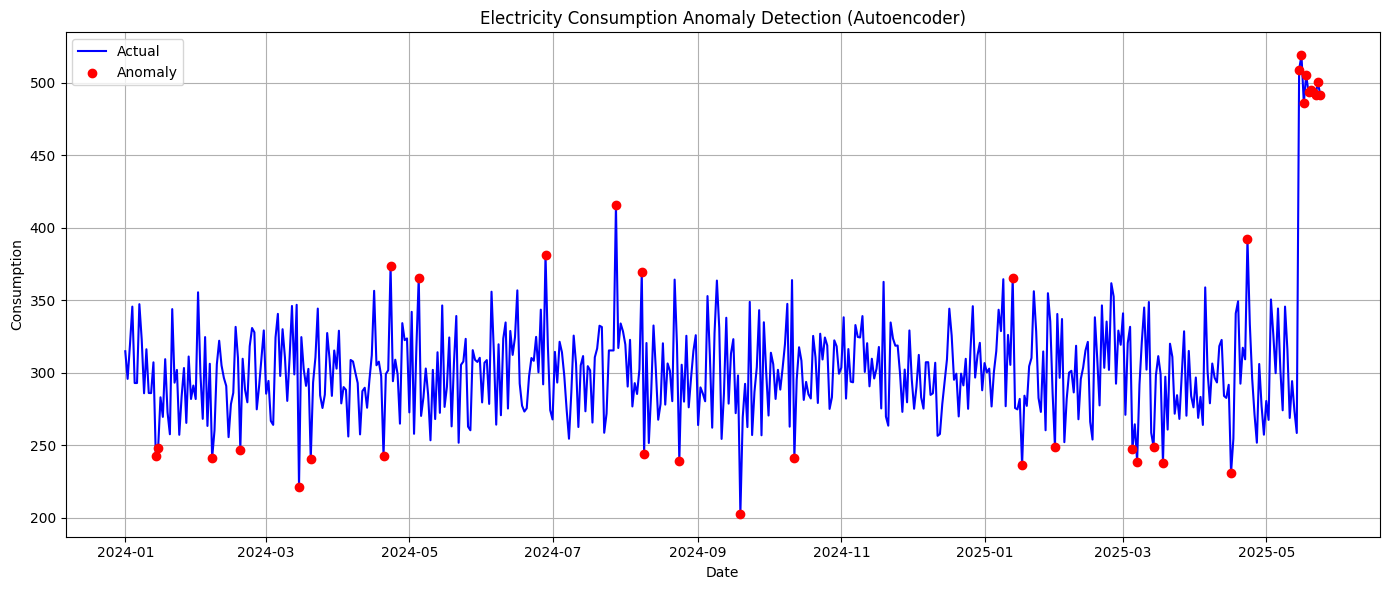

In [ ]:
# write your code from here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

np.random.seed(42)
normal_data = np.random.normal(loc=300, scale=30, size=500)
anomalies = np.random.normal(loc=500, scale=10, size=10)
consumption = np.concatenate([normal_data, anomalies])
dates = pd.date_range(start='2024-01-01', periods=len(consumption))

df = pd.DataFrame({'timestamp': dates, 'consumption': consumption})

# Normalize the data
scaler = MinMaxScaler()
df['scaled'] = scaler.fit_transform(df[['consumption']])
input_dim = 1
input_layer = Input(shape=(input_dim,))
encoded = Dense(8, activation='relu')(input_layer)
encoded = Dense(4, activation='relu')(encoded)
decoded = Dense(8, activation='relu')(encoded)
output_layer = Dense(1, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError())

# Step 3: Train on normal data only (assume first 500 points are normal)
X_train = df['scaled'][:500].values.reshape(-1, 1)
autoencoder.fit(X_train, X_train, epochs=50, batch_size=16, shuffle=True, verbose=0)

X_all = df['scaled'].values.reshape(-1, 1)
X_recon = autoencoder.predict(X_all)


recon_error = np.mean(np.square(X_all - X_recon), axis=1)
threshold = np.percentile(recon_error[:500], 95)  # Use 95th percentile of normal data as threshold
df['recon_error'] = recon_error
df['anomaly'] = df['recon_error'] > threshold
plt.figure(figsize=(14, 6))
plt.plot(df['timestamp'], df['consumption'], label='Actual', color='blue')
plt.scatter(df[df['anomaly']]['timestamp'], 
            df[df['anomaly']]['consumption'], 
            color='red', label='Anomaly', zorder=5)
plt.title('Electricity Consumption Anomaly Detection (Autoencoder)')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

